<a href="https://colab.research.google.com/github/MahirAzraf/Funnel-Conversion-Analysis/blob/main/funnel_conversion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Drive Connect**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Navigate to the ZIP file path**

In [28]:
zip_path = '/content/drive/MyDrive/funnel conversion.zip'

**Unzip the File**

In [29]:
import zipfile

zip_file_path = "/content/drive/MyDrive/funnel conversion.zip"
extract_path = "/content/funnel_data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete!")


✅ Extraction complete!


**List Extracted files**

In [30]:
import os

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(file)


sales_funnel_chart.png
home_page_table.csv
payment_page_table.csv
sales_funnel_analysis.ipynb
user_table.csv
search_page_table.csv
payment_confirmation_table.csv
README.md


**Load the CSVs into DataFrames**

In [31]:
import pandas as pd

base_path = "/content/funnel_data"

users_df = pd.read_csv(f"{base_path}/user_table.csv")
home_df = pd.read_csv(f"{base_path}/home_page_table.csv")
search_df = pd.read_csv(f"{base_path}/search_page_table.csv")
payment_df = pd.read_csv(f"{base_path}/payment_page_table.csv")
confirmation_df = pd.read_csv(f"{base_path}/payment_confirmation_table.csv")


**Preview the Data**

In [32]:
print("Users table:")
print(users_df.head())

print("\nHome page visits:")
print(home_df.head())

print("\nSearch page visits:")
print(search_df.head())

print("\nPayment page visits:")
print(payment_df.head())

print("\nPayment confirmation:")
print(confirmation_df.head())


Users table:
   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male

Home page visits:
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page

Search page visits:
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page

Payment page visits:
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page

Payment confirmation:
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


**Join Tables to Create the Funnel**

In [33]:
funnel = users_df \
    .merge(home_df, how='left', on='user_id', suffixes=('', '_home')) \
    .merge(search_df, how='left', on='user_id', suffixes=('', '_search')) \
    .merge(payment_df, how='left', on='user_id', suffixes=('', '_payment')) \
    .merge(confirmation_df, how='left', on='user_id', suffixes=('', '_confirmation'))

funnel.head()


,user_id,date,device,sex,page,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


**Total Users**

In [34]:
total_users = funnel.shape[0]
print(f"Total users: {total_users}")


Total users: 90400


**Count Users at Each Funnel Stage**

In [35]:
home_visits = funnel['page'].notnull().sum()
search_visits = funnel['page_search'].notnull().sum()
payment_visits = funnel['page_payment'].notnull().sum()
confirmation_visits = funnel['page_confirmation'].notnull().sum()

print(f"Visited Home Page: {home_visits} ({home_visits / total_users:.2%})")
print(f"Visited Search Page: {search_visits} ({search_visits / home_visits:.2%})")
print(f"Reached Payment Page: {payment_visits} ({payment_visits / search_visits:.2%})")
print(f"Confirmed Payment: {confirmation_visits} ({confirmation_visits / payment_visits:.2%})")


Visited Home Page: 90400 (100.00%)
Visited Search Page: 45200 (50.00%)
Reached Payment Page: 6030 (13.34%)
Confirmed Payment: 452 (7.50%)


**Visualize the Funnel**

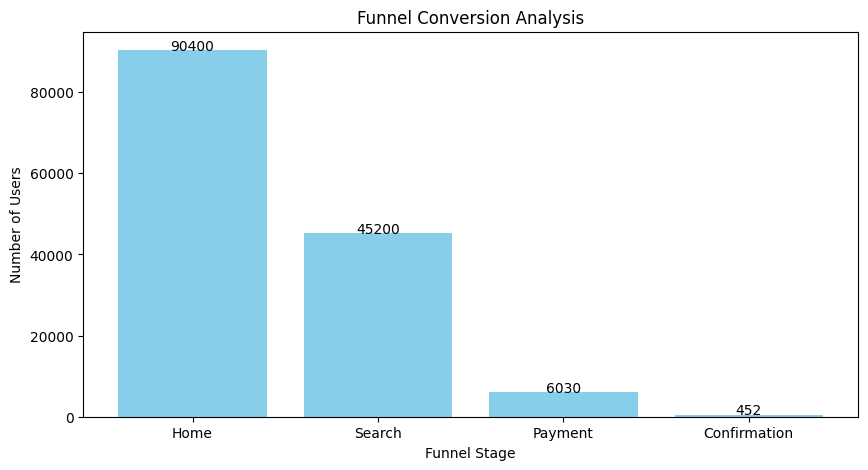

In [36]:
import matplotlib.pyplot as plt

stages = ['Home', 'Search', 'Payment', 'Confirmation']
values = [home_visits, search_visits, payment_visits, confirmation_visits]

plt.figure(figsize=(10, 5))
plt.bar(stages, values, color='skyblue')
plt.title('Funnel Conversion Analysis')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Users')
for i, val in enumerate(values):
    plt.text(i, val + 5, str(val), ha='center')
plt.show()


**Calculate Drop-Off Rate at Each Stage**

In [37]:
def calc_dropoff(prev, current):
    drop = prev - current
    rate = (drop / prev) * 100
    return drop, rate

drop1, rate1 = calc_dropoff(home_visits, search_visits)
drop2, rate2 = calc_dropoff(search_visits, payment_visits)
drop3, rate3 = calc_dropoff(payment_visits, confirmation_visits)

print(f"\nDrop-off from Home → Search: {drop1} users ({rate1:.2f}%)")
print(f"Drop-off from Search → Payment: {drop2} users ({rate2:.2f}%)")
print(f"Drop-off from Payment → Confirmation: {drop3} users ({rate3:.2f}%)")



Drop-off from Home → Search: 45200 users (50.00%)
Drop-off from Search → Payment: 39170 users (86.66%)
Drop-off from Payment → Confirmation: 5578 users (92.50%)


**Funnel as Percentages of Total Users**

/tmp/ipython-input-38-612683745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stages, y=percent_values, palette='Blues_d')


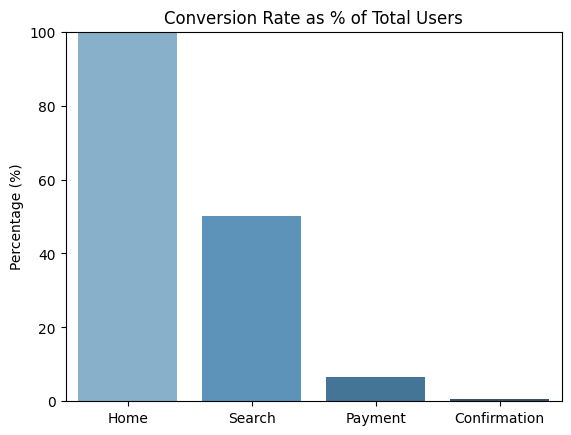

In [38]:
import seaborn as sns

percent_values = [v / total_users * 100 for v in values]
sns.barplot(x=stages, y=percent_values, palette='Blues_d')
plt.title("Conversion Rate as % of Total Users")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.show()


# 📊 Sales Funnel Conversion Analysis Report

## 🗂️ Dataset Overview
This analysis evaluates user journey stages across a sales funnel using web event data:
- `user_table.csv`: User demographic and device data
- `*_page_table.csv`: Page visit data for Home, Search, Payment, and Confirmation

## 🔁 Funnel Stages
We analyzed the following steps:
1. **Home Page Visit** – Entry point
2. **Search Page Visit** – Product engagement
3. **Payment Page Visit** – Purchase intent
4. **Payment Confirmation Page** – Successful purchase

---

## 📉 Conversion & Drop-off Metrics

| Stage | Users | Drop-off | Conversion Rate |
|-------|-------|----------|-----------------|
| Home → Search | 90,400 → 45,200 | 45,200 | 50.00% |
| Search → Payment | 45,200 → 6,030 | 39,170 | 13.33% |
| Payment → Confirmation | 6,030 → 452 | 5,578 | 7.49% |

- 🔻 **Major drop-off** is between **Search** and **Payment**
- 🔚 Only **0.5%** of total users complete the funnel

---

## 🔍 Insights

- **Search-to-Payment** stage is a major friction point — could be pricing, product clarity, or cart UX issues.
- **Confirmation rate** is also low — maybe due to payment gateway problems, slow loading, or trust issues.

---

## 📌 Recommendations

1. 🔎 **Improve Search Experience**: Add filters, fast loading, product recommendations
2. 💳 **Simplify Payment Page**: Show trust badges, reduce form fields, add wallet options
3. ✅ **Strengthen Final Confirmation**: Ensure transaction success messages are clear and mobile-optimized

---

### 📅 Date Range: `2015-01` to `2015-04`  
### 👨‍💻 Device Types: Desktop (majority)


**By Device Type**

In [39]:
device_segment = funnel.groupby('device').agg({
    'page_search': lambda x: x.notnull().mean(),
    'page_payment': lambda x: x.notnull().mean(),
    'page_confirmation': lambda x: x.notnull().mean()
}).reset_index()

device_segment.columns = ['Device', 'Search Conversion', 'Payment Conversion', 'Confirmation Conversion']
device_segment


,Device,Search Conversion,Payment Conversion,Confirmation Conversion
0,Desktop,0.5,0.05,0.002492
1,Mobile,0.5,0.10,0.010000


**By Gender**

In [40]:
gender_segment = funnel.groupby('sex').agg({
    'page_search': lambda x: x.notnull().mean(),
    'page_payment': lambda x: x.notnull().mean(),
    'page_confirmation': lambda x: x.notnull().mean()
}).reset_index()

gender_segment.columns = ['Gender', 'Search Conversion', 'Payment Conversion', 'Confirmation Conversion']
gender_segment


,Gender,Search Conversion,Payment Conversion,Confirmation Conversion
0,Female,0.503073,0.068774,0.005347
1,Male,0.496944,0.064644,0.004655


**Plotting Segment Comparison**

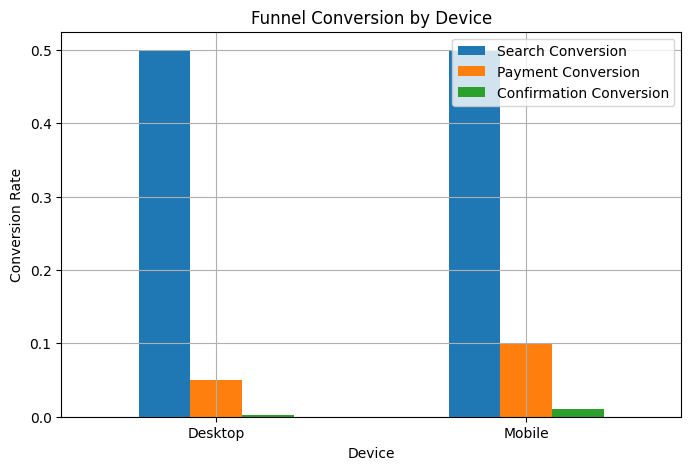

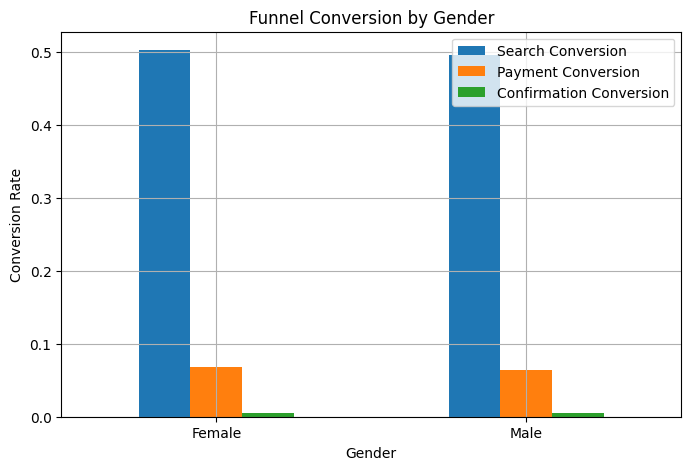

In [41]:
import matplotlib.pyplot as plt

device_segment.set_index('Device').plot(kind='bar', figsize=(8,5), title='Funnel Conversion by Device')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

gender_segment.set_index('Gender').plot(kind='bar', figsize=(8,5), title='Funnel Conversion by Gender')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
